Importing Packages

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import grangercausalitytests, adfuller


Reading File

In [43]:
# Importing the dataset
df = pd.read_csv('Energy_consumption.csv')
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [44]:
#Checking for missing values
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB
Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0


Indexing and data cleaning

In [45]:
# Converting the 'Timestamp' column to datetime format and setting it as the index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp')
df.set_index('Timestamp', inplace=True)

#Correcting the Day of the Week
df['DayOfWeek'] = df.index.day_name()


Plotting energy consumption and temperature over time

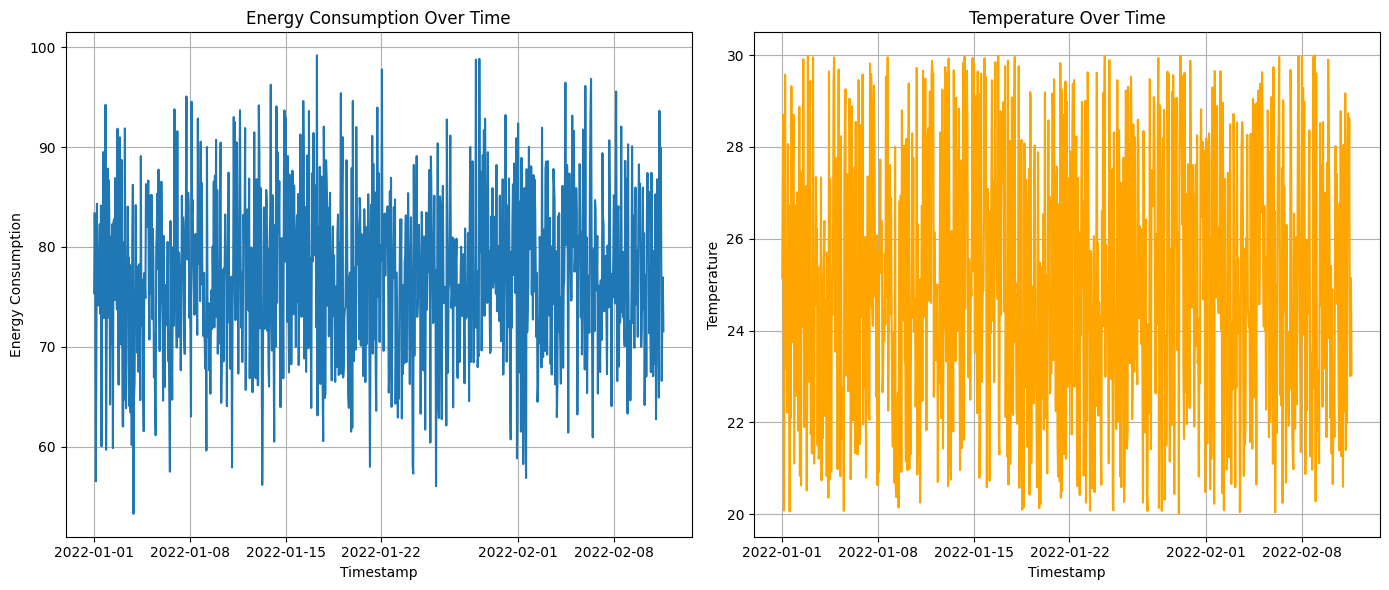

In [46]:
# plotting the time series data

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharex=False)

# Plot Energy Consumption
axes[0].plot(df.index, df['EnergyConsumption'], marker='')
axes[0].set_title('Energy Consumption Over Time')
axes[0].set_xlabel('Timestamp')
axes[0].set_ylabel('Energy Consumption')
axes[0].grid(True)

# Plot Temperature
axes[1].plot(df.index, df['Temperature'], marker='', color='orange')
axes[1].set_title('Temperature Over Time')
axes[1].set_xlabel('Timestamp')
axes[1].set_ylabel('Temperature')
axes[1].grid(True)

plt.tight_layout()
plt.show()

Correlation map for numerical data

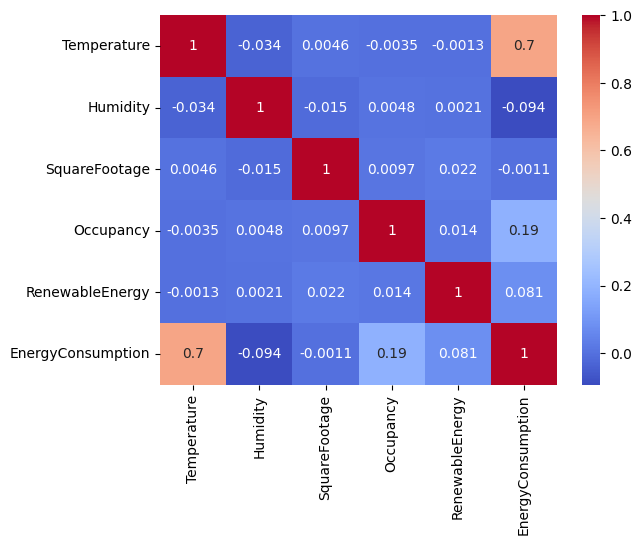

In [47]:
# Correlation matrix
df_numeric = df.select_dtypes(include=['number'])
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

boxplot for energy consumption against select non-numerical data

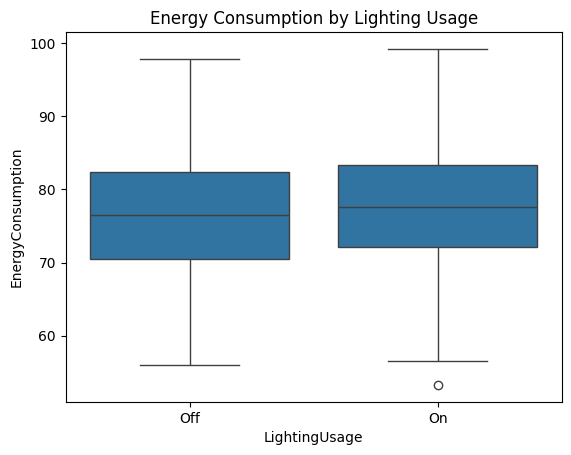

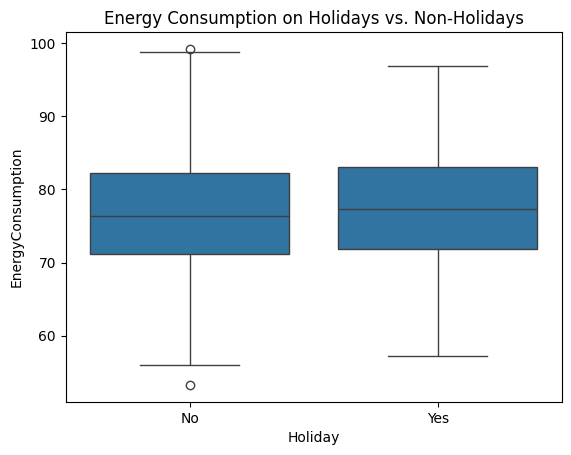

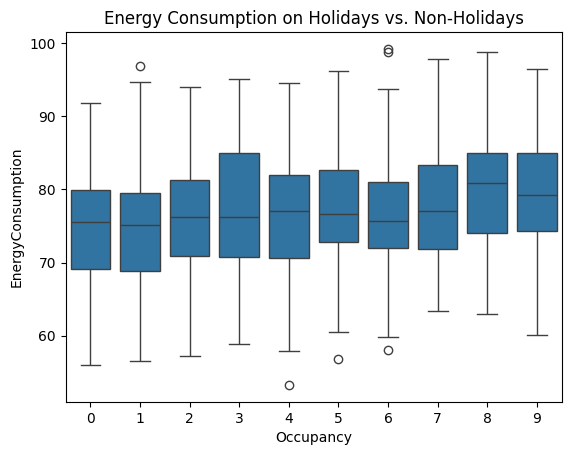

In [48]:
#boxplot

#LightingUsage
sns.boxplot(data=df, x='LightingUsage', y='EnergyConsumption')
plt.title('Energy Consumption by Lighting Usage')
plt.show()

#Holiday
sns.boxplot(data=df, x='Holiday', y='EnergyConsumption')
plt.title('Energy Consumption on Holidays vs. Non-Holidays')
plt.show()

#Occupancy
sns.boxplot(data=df, x='Occupancy', y='EnergyConsumption')
plt.title('Energy Consumption on Holidays vs. Non-Holidays')
plt.show()

Resampled time series to daily interval and plotted

<Axes: title={'center': 'Daily Average Energy Consumption'}, xlabel='Timestamp'>

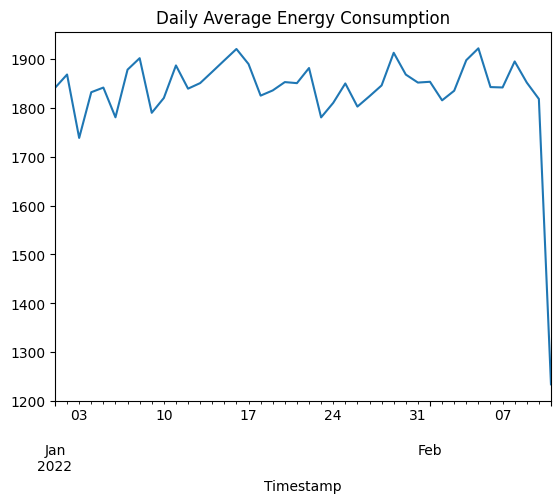

In [49]:
# plot of resampled data over days 
df.resample('D')['EnergyConsumption'].sum().plot(title="Daily Average Energy Consumption")

In [50]:
#Viewing the last 24 hours of data in reverse order

last_24_hours_df = df.last('24h')
last_24_hours_df[::-1].head()

/var/folders/tn/5km8g6b53hg957fz11k9bb7m0000gn/T/ipykernel_92544/4149322368.py:3: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_24_hours_df = df.last('24h')


,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,,,,,,,,,,
2022-02-11 15:00:00,23.051165,42.615421,1018.140606,6,Off,On,2.455657,Friday,No,71.545311
2022-02-11 14:00:00,25.138365,31.306459,1309.079719,3,On,Off,20.425163,Friday,Yes,76.950389
2022-02-11 13:00:00,23.005340,48.720501,1320.285281,6,Off,On,0.297079,Friday,Yes,72.753471
2022-02-11 12:00:00,23.836647,47.256435,1705.235156,4,Off,On,25.748176,Friday,Yes,66.577320
2022-02-11 11:00:00,28.619382,48.850160,1080.087000,5,Off,Off,21.194696,Friday,No,82.306692


We see that the full 24 hours is not captured on 2022-02-11. This explains the abrupt drop in the Daily Average Energy Consumption graph above

Plotting energy usage again days of the week

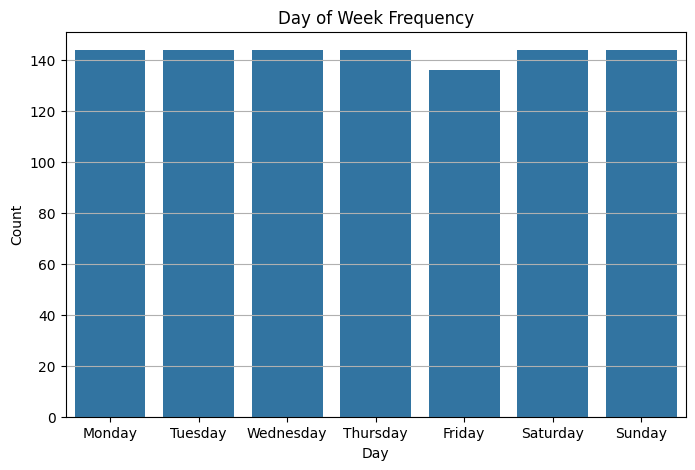

In [51]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='DayOfWeek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of Week Frequency')
plt.xlabel('Day')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.show()

Seasonal Decomposing of data to analyse stationarity of data 

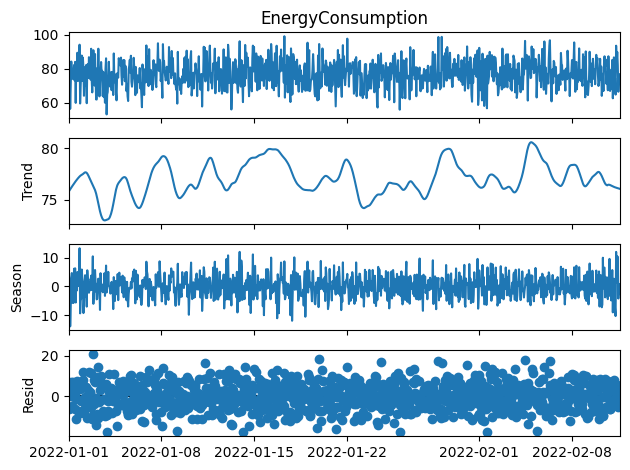

In [52]:
stl = STL(df['EnergyConsumption'], period=24)
result = stl.fit()
result.plot()
plt.tight_layout()
plt.show()

The raw data displays some trends and 24hr cycles

Below, we view the average usage by the hour of the day

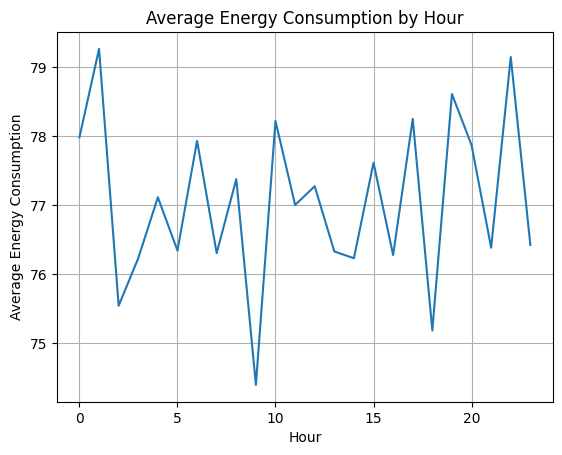

In [53]:
# Ensure the 'Hour' column exists
df['Hour'] = df.index.hour

# Group by 'Hour' and plot the average energy consumption
df.groupby('Hour')['EnergyConsumption'].mean().plot(kind='line', title='Average Energy Consumption by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Energy Consumption')
plt.grid(True)
plt.show()

Plotting moving average onto time series

In [54]:
# 1-say-SMA and 7-day-SMA
df['1-day-SMA'] = df['EnergyConsumption'].rolling(window=24).mean()
df['7-day-SMA'] = df['EnergyConsumption'].rolling(window=24*7).mean()

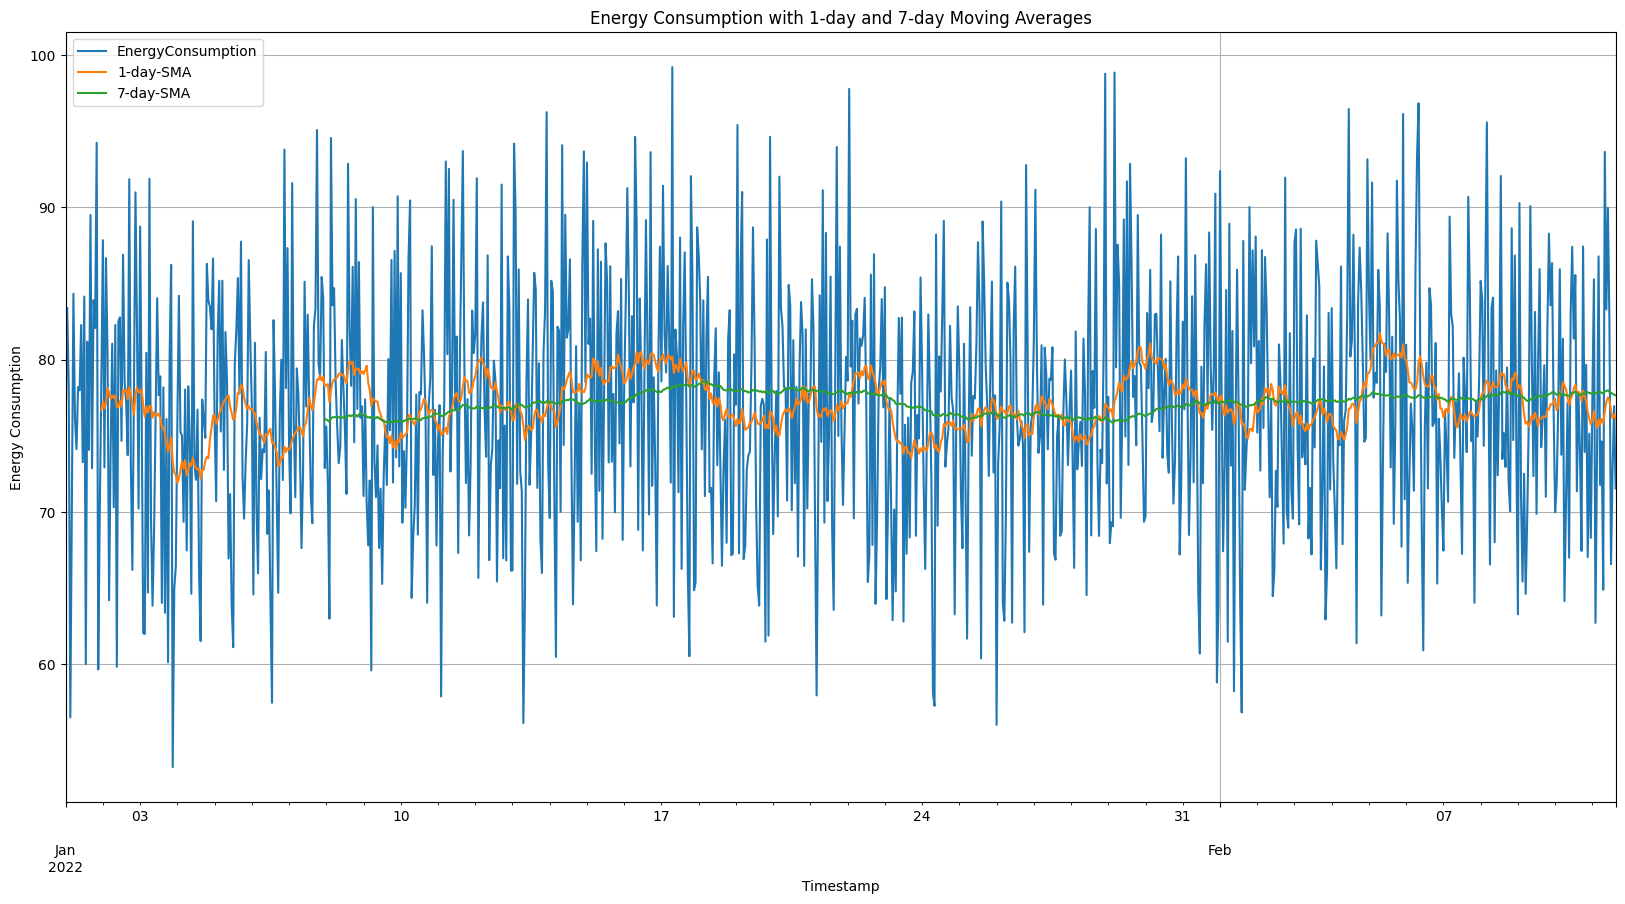

In [55]:
#plotting the energy consumption, 1-day and 7-day moving averages
df[['EnergyConsumption', '1-day-SMA', '7-day-SMA']].plot(figsize=(20, 10))
plt.title('Energy Consumption with 1-day and 7-day Moving Averages')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()

ACF (autocorrelation) plot

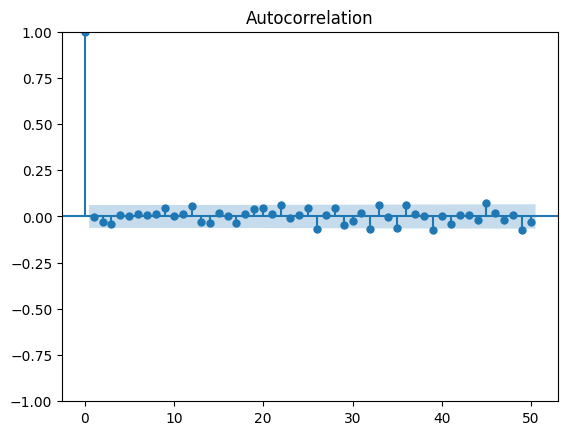

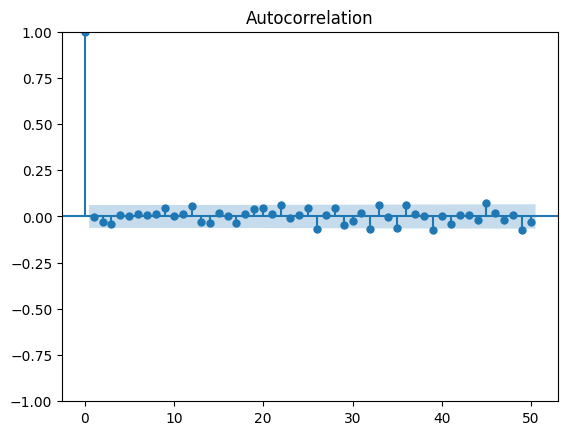

In [56]:
plot_acf(df['EnergyConsumption'].dropna(), lags=50)

In [57]:
# Granger Causality Test: Does Temperature help predict EnergyConsumption?
print("=== Granger Causality Test ===")
max_lag = 3
test_result = grangercausalitytests(df[['EnergyConsumption', 'Temperature']], maxlag=max_lag, verbose=True)

print("\n=== Summary of p-values ===")
for lag in range(1, max_lag + 1):
    p_value = test_result[lag][0]['ssr_ftest'][1]
    print(f"Lag {lag}: p-value = {p_value:.4f}")

=== Granger Causality Test ===

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0015  , p=0.9693  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=0.0015  , p=0.9692  , df=1
likelihood ratio test: chi2=0.0015  , p=0.9692  , df=1
parameter F test:         F=0.0015  , p=0.9693  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0052  , p=0.9948  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=0.0104  , p=0.9948  , df=2
likelihood ratio test: chi2=0.0104  , p=0.9948  , df=2
parameter F test:         F=0.0052  , p=0.9948  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0529  , p=0.9840  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=0.1598  , p=0.9838  , df=3
likelihood ratio test: chi2=0.1597  , p=0.9838  , df=3
parameter F test:         F=0.0529  , p=0.9840  , df_denom=990, df_num=3

=== Summary of p-values ===
Lag 1: p-value = 0.9693
Lag 2: p-v

/Users/tahamalik/Documents/ML/Git/Git/ML-AI-projects/watt-wise/venv/lib/python3.13/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Conclusion: There is no statistical evidence that past values of Temperature provide predictive information about EnergyConsumption (in the Granger sense).

In [63]:
# adfuller test: is the energy consumption time series stationary?
result = adfuller(df['EnergyConsumption'])

labels = ['ADF Statistic', 'p-value', '# Lags Used', '# Observations Used', 'Critical Values', 'IC Best']
for label, value in zip(labels, result):
    print(f"{label}: {value}")

if result[1] < 0.05:
    print("✅ The series is stationary (reject null hypothesis).")
else:
    print("❌ The series is not stationary (fail to reject null hypothesis).")

ADF Statistic: -31.576934146718358
p-value: 0.0
# Lags Used: 0
# Observations Used: 999
Critical Values: {'1%': np.float64(-3.4369127451400474), '5%': np.float64(-2.864437475834273), '10%': np.float64(-2.568312754566378)}
IC Best: 6868.541335798459
✅ The series is stationary (reject null hypothesis).


ADF Statistic and autocorrelation plot suggest that the raw data is stationary. However, the seasononal decompositon suggests the the data is not stationary. We will see if a transformed version of the the data is stationary  

Why This Happens
	1.	ADF Test (Augmented Dickey-Fuller):
	•	    Tests for unit root, mainly looking at trend stationarity.
	•	    It might say data is stationary if there’s no strong trend or the noise is high, even if seasonality is present.
	2.	Autocorrelation Plots (ACF/PACF):
	•	    Can suggest stationarity visually, especially if correlations decay quickly.
	•	    But ACF patterns can also reveal seasonal structures, which are a form of non-stationarity.
	3.	STL Decomposition:
	•	    Explicitly separates the data into trend, seasonal, and residual components.
	•	    If there’s a visible seasonal component, your data is not strictly stationary, even if the trend is absent.

In [39]:
y = df['EnergyConsumption']

# 1. First-order differencing
y_diff = y.diff().dropna()

# 2. Seasonal differencing (24 hrs)
y_diff_seasonal = y_diff.diff(24).dropna()

# 3. ADF Test
print("=== ADF Test After Differencing ===")
adf_result = adfuller(y_diff_seasonal)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
if adf_result[1] < 0.05:
    print("✅ The differenced series is stationary.")
else:
    print("❌ The differenced series is NOT stationary.")

=== ADF Test After Differencing ===
ADF Statistic: -6.906826545445007
p-value: 1.2410930085661296e-09
✅ The differenced series is stationary.


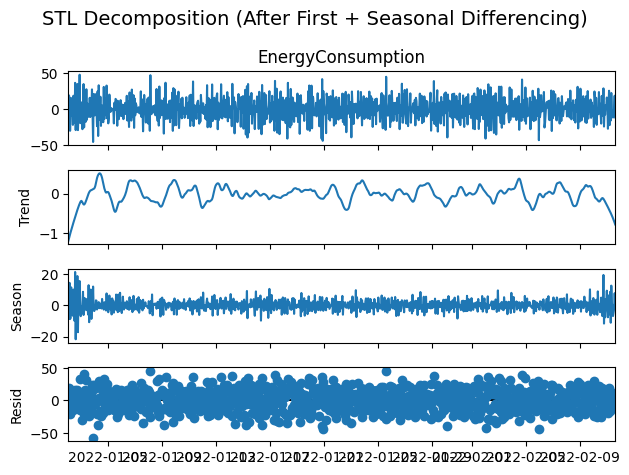

In [40]:
from statsmodels.tsa.seasonal import STL

# Apply STL to the differenced series (use period=24 for hourly data with daily seasonality)
stl = STL(y_diff_seasonal, period=24)
result = stl.fit()

# Plot the results
result.plot()
plt.suptitle('STL Decomposition (After First + Seasonal Differencing)', fontsize=14)
plt.tight_layout()
plt.show()

“The STL decomposition suggests that the transformed data exhibits increased stationarity. However, the extracted trend and seasonal components remain noisy. This noise could potentially be reduced by resampling the data to a daily frequency. Nonetheless, we choose not to resample, as doing so would significantly reduce the number of available data points, limiting the reliability of subsequent analysis.”

Extra: Pair plot of numerical data

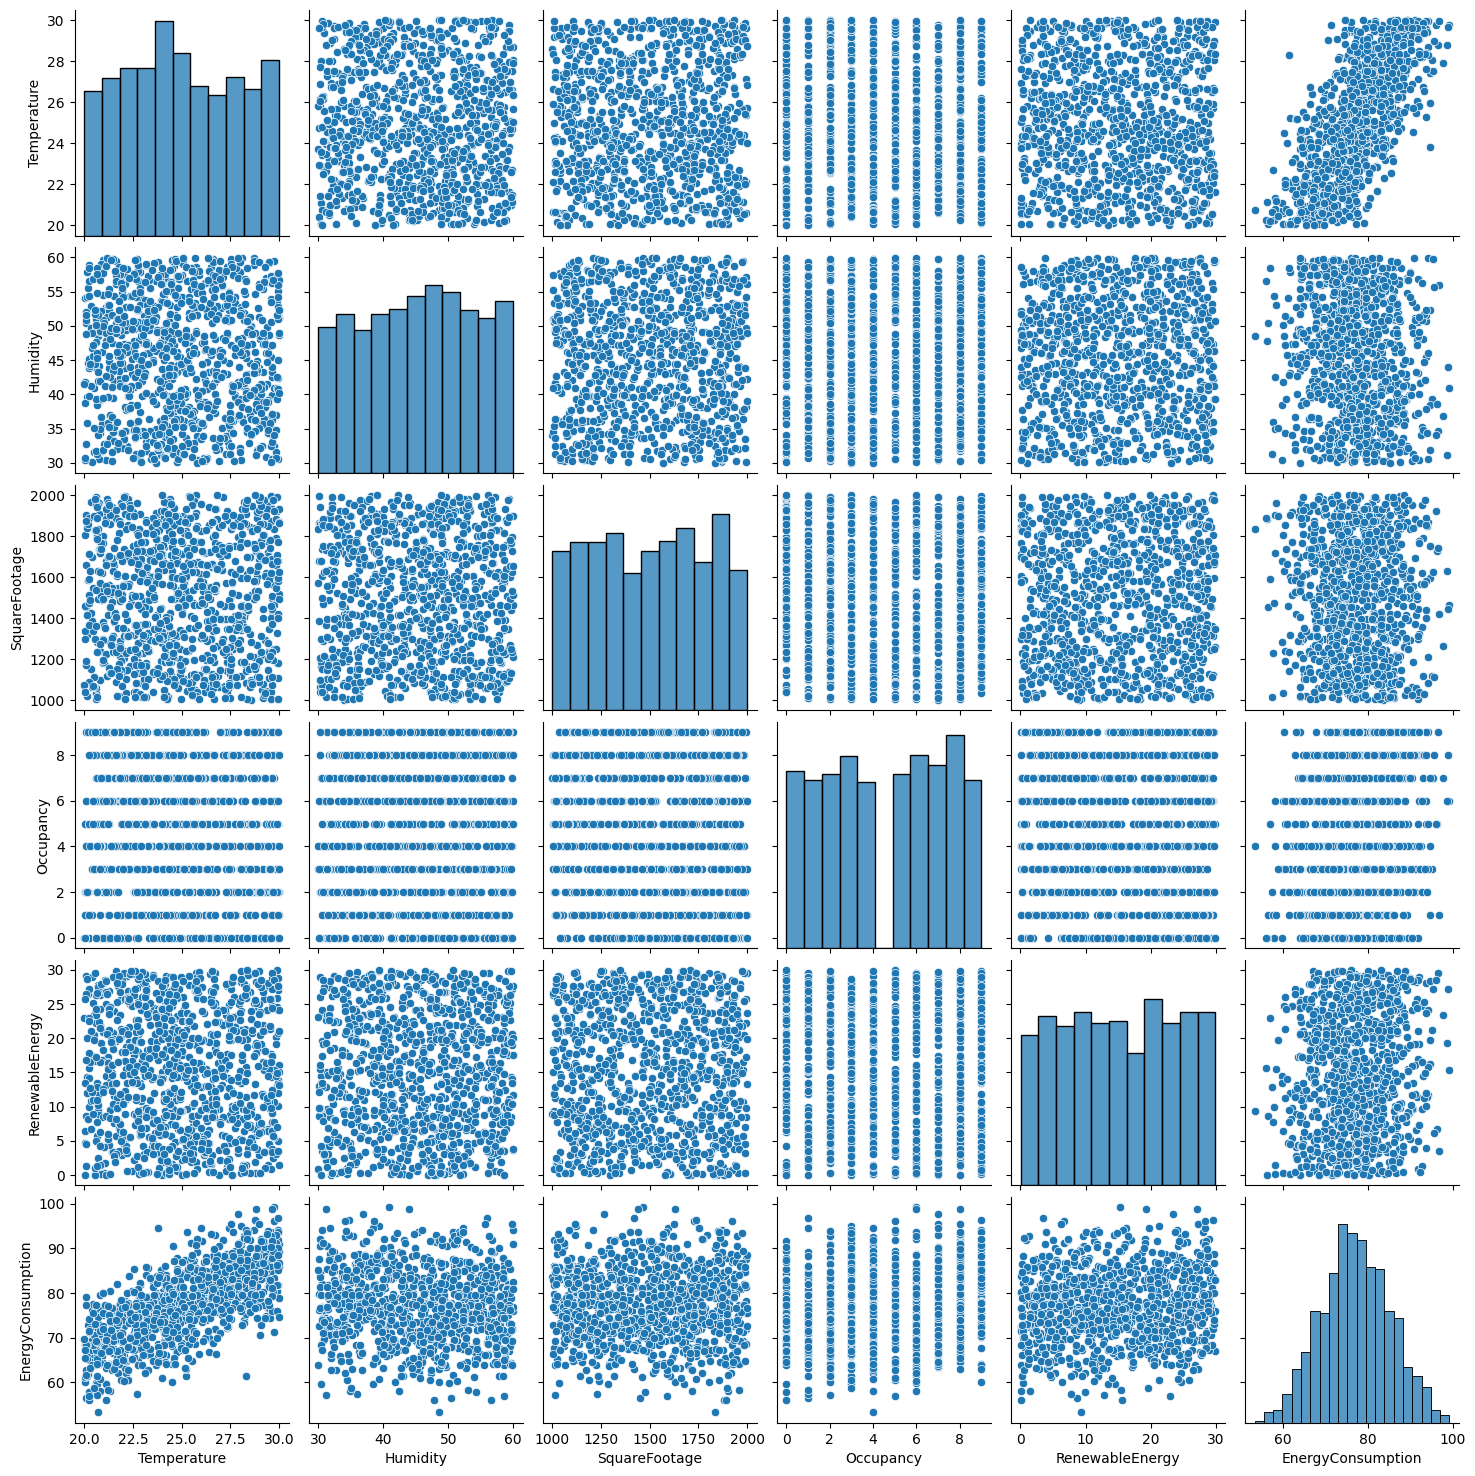

In [41]:
sns.pairplot(df[['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'RenewableEnergy', 'EnergyConsumption']])
plt.show()